In [104]:
%matplotlib inline

In [103]:
import pickle as pkl
import os
import matplotlib as mpl
import numpy as np
import pandas as pd

from helpers import infected_nodes
from glob import glob
from matplotlib import pyplot as plt

In [120]:
graph = 'lattice-1024'
obs_method = 'uniform'

# data_id = '{}-msi-s0.025-o0.2-om{}'.format(graph, obs_method)
data_id = '{}-msi-s0.25-o0.2'.format(graph)
probas_dir = "outputs/inf_probas-weighted/{}/loop_erased/random/".format(data_id)
cacasde_dir = "cascade-weighted/{}".format(data_id)

fig_dir = 'figs/infection_probability_evaluation'

In [121]:
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

In [122]:
inf_freq_list = []
uninf_freq_list = []

bins= np.linspace(0, 1.0, 11)


for p in glob(probas_dir + '*'):
    filename = os.path.basename(p)
    obs, c = pkl.load(open(cacasde_dir +'/' + filename, 'rb'))[:2]
    probas = pkl.load(open(p, 'rb'))[0] 
    inf_nodes = list(set(infected_nodes(c)) - set(obs))
    uninf_nodes = list(set(np.arange(len(c))) - set(inf_nodes) - set(obs))
    assert (len(inf_nodes) + len(uninf_nodes)) == (len(c) - len(obs))
    inf_nodes_p = probas[inf_nodes]
    uninf_nodes_p = probas[uninf_nodes]
    
    inf_freq, _ = np.histogram(inf_nodes_p, bins=bins) 
    uninf_freq, _ = np.histogram(uninf_nodes_p, bins=bins) 
    inf_freq_list.append(inf_freq)
    uninf_freq_list.append(uninf_freq)
assert len(inf_freq_list) > 0

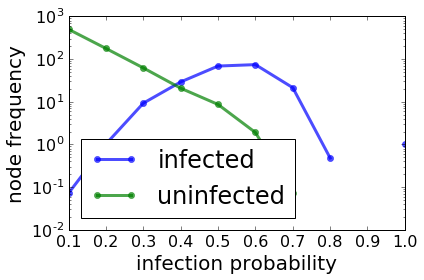

In [123]:
mpl.style.use('paper')
fig, ax = plt.subplots()
ax.semilogy(bins[1:], np.mean(inf_freq_list, axis=0), '.-', alpha=0.7)
ax.semilogy(bins[1:], np.mean(uninf_freq_list, axis=0), '.-', alpha=0.7)
ax.set_ylabel('node frequency')
ax.set_xlabel('infection probability')
ax.legend(['infected', 'uninfected'], loc='best')
fig.tight_layout()
fig.savefig(fig_dir + '/{}.png'.format(data_id))

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/inf_probas/grqc-s40-120-o0.25.pkl'

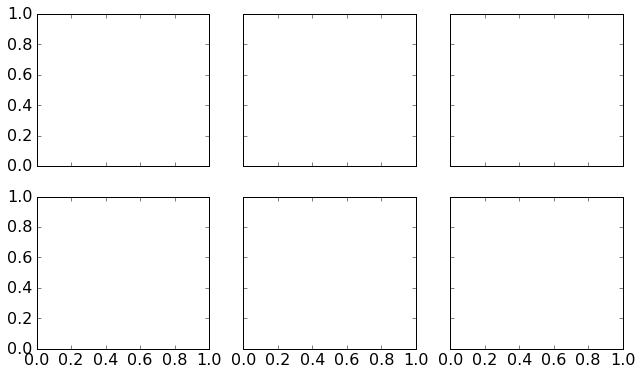

In [12]:
# root_sampling_methods = ['random_root', 'pagerank-eps0.0', 'pagerank-eps0.5', 'true_root']
root_sampling_methods = ['true_root', 'random_root']
# obs_fractions = [0.25, 0.5, 0.75]
n_row, n_col = len(root_sampling_methods), len(obs_fractions)
width = 3
fig, axes = plt.subplots(n_row, n_col, figsize=((n_col + 0.5) * width, n_row * width),
                         sharex=True,
                         sharey=True)

for i, root_sampling_method in enumerate(root_sampling_methods):
    for j, obs_frac in enumerate(obs_fractions):        
        if len(obs_fractions) == 1:
            ax = axes[i]
        else:
            ax = axes[i, j]
        plot_one_config(obs_frac, root_sampling_method, ax)
        if i == 0:
            ax.set_title('report proba={}'.format(obs_frac))
        if j == 0:
            ax.set_ylabel('frequency \n {}'.format(root_sampling_method))
        if i == 1:
            print(i, j)
            ax.set_xlabel('infection probability')
            ax.set_xticks([0, 0.5, 1.0])
        ax.set_xlim(0, 1.0)
        ax.set_ylim(0, 10e5)
fig.tight_layout()
ax.legend(labels=['infected(hidden)', 'uninfected'], loc="best", ncol=2, bbox_to_anchor=(0,1.2))
fig.savefig('figs/infection-probability/{}.png'.format(graph))

In [7]:
def get_freqs(probas_list, bins):
    probas = pd.Series(probas_list).as_matrix()
    ys, _ = np.histogram(probas, bins=bins)    
    return ys    

In [9]:
def plot_one_config(obs_fraction, root_sampling_method, ax):
    inf_freq, uninf_freq = get_freqs_from_config(obs_fraction, root_sampling_method)
    
    ax.semilogy(bins[1:], inf_freq, '.-', alpha=0.7)
    ax.semilogy(bins[1:], uninf_freq, '.-', alpha=0.7)
    # ax.legend(['infected(hidden)', 'uninfected'])    

In [ ]:
c = np.histogram(inf_nodes_probas_list) 
print(c)
c = np.histogram(uninf_nodes_probas_list)
print(c)

In [8]:
def get_freqs_from_config(obs_fraction, root_sampling_method):
    # inf_probas_path = "outputs/inf_probas/{}-s0.02-q{}.pkl".format(graph, obs_fraction)
    inf_probas_path = "outputs/inf_probas/{}-s{}-{}-o{}.pkl".format(graph, min_size, max_size, obs_fraction)

    stuff = pkl.load(open(inf_probas_path, 'rb'))
    # print(stuff.keys())
    inf_nodes_probas_list = []
    uninf_nodes_probas_list = []
    for row in stuff[root_sampling_method]:
        c, obs = row['c'], row['obs']
        inf_nodes = set(infected_nodes(c))
        inf_nodes -= set(obs)  # only hidden infections
        uninf_nodes = (c < 0).nonzero()[0]

        probas = row['st_naive_probas']
        inf_node_probas = probas[list(inf_nodes)]
        inf_nodes_probas_list += list(inf_node_probas)

        uninf_node_probas = probas[list(uninf_nodes)]
        uninf_nodes_probas_list += list(uninf_node_probas)
    inf_freq = get_freqs(inf_nodes_probas_list, bins)
    uninf_freq = get_freqs(uninf_nodes_probas_list, bins)
    return inf_freq, uninf_freq

In [ ]:
c = np.histogram(inf_nodes_probas_list) 
print(c)
c = np.histogram(uninf_nodes_probas_list)
print(c)

In [ ]:
pd.Series(uninf_nodes_probas_list).plot('hist')